K-최근접 이웃 (K-Nearest Neighbors, KNN)이란?


K-최근접 이웃은 새로운 데이터가 주어졌을 때, 주변의 가장 가까운 K개의 이웃을 찾아 그들의 속성을 참고해 예측하는 직관적인 머신러닝 알고리즘입니다.


1. 핵심 원리

새로운 데이터에 대해,


    - 가장 가까운 K개 이웃을 찾습니다.

    - 이웃들의 클래스를 확인합니다.

    - 다수결을 통해 새로운 데이터의 클래스를 예측합니다.


2. 'K'는 무엇인가요?

'K'는 이웃의 수를 의미하며, 모델 성능에 중요한 영향을 미칩니다.

     - K가 작으면: 미세한 패턴에 민감해져 예측이 불안정할 수 있습니다.

     - K가 크면: 전체적인 패턴을 따르지만, 너무 크면 예측이 부정확해질 수 있습니다.

따라서 적절한 K 값을 찾는 과정이 중요합니다.


3. '가깝다'는 기준은?

KNN은 데이터 간의 거리를 계산해 가까움을 판단합니다. 

주로 유클리드 거리를 사용하며, 거리가 왜곡되지 않도록 각 특성의 스케일을 맞춰주는 표준화 작업이 필수적입니다.



장점

- 매우 간단하고 직관적입니다.

- 사전 학습이 필요 없습니다.



단점

- 데이터가 많으면 예측 속도가 느립니다.

- 특성의 스케일에 매우 민감합니다.

--- K-최근접 이웃 모델 성능 평가 (n_neighbors=5) ---
훈련 세트 정확도: 0.9033
테스트 세트 정확도: 0.8351


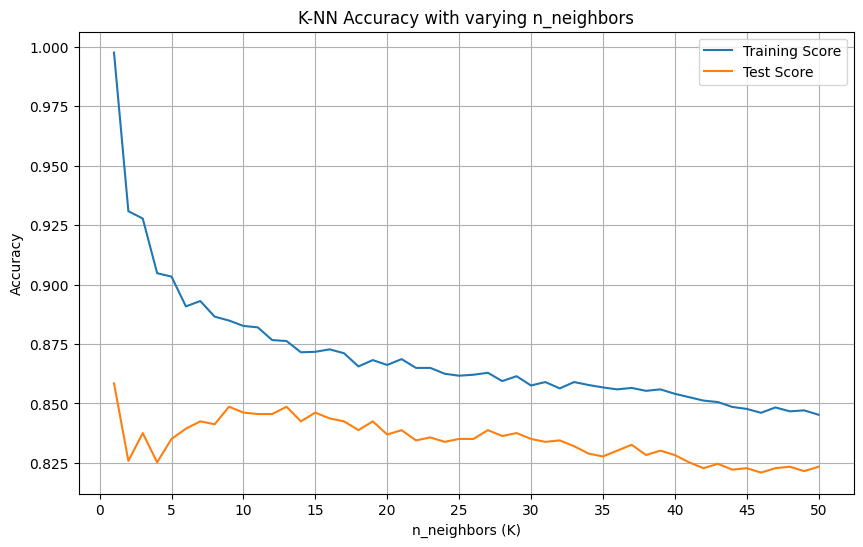


테스트 정확도가 가장 높았던 K 값은 1 입니다.
최고 테스트 정확도: 0.8585


In [2]:
# 1. 필요한 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. 와인 데이터를 불러와 특성(X)과 타겟(y)을 분리합니다.
# 이 파일은 '03_모델_훈련_평가' 폴더에 있으므로,
# 'wine_csv_data.csv' 파일을 불러오려면 상대 경로를 사용해야 합니다.
# 만약 'my_ml_project/data/'에 파일을 두었다면 pd.read_csv('../../data/wine_csv_data.csv')와 같이 사용합니다.
df = pd.read_csv("https://bit.ly/wine_csv_data")
X = df[['alcohol', 'sugar', 'pH']]
y = df['class']

# 3. 데이터를 훈련 세트와 테스트 세트로 나눕니다.
# test_size=0.25는 훈련 세트 75%, 테스트 세트 25% 비율을 의미합니다.
# `y_test` 변수를 추가하여 `train_test_split`의 4개 반환값을 모두 할당합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4. K-최근접 이웃은 거리 기반 알고리즘이므로, 스케일링이 필수적입니다.
# 특성(X) 데이터를 표준화(Standard Scaling)하여 스케일을 맞춥니다.
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# 5. K-최근접 이웃 분류기(KNeighborsClassifier) 모델을 만듭니다.
# n_neighbors=5는 가장 가까운 이웃 5개의 데이터를 참고하겠다는 의미입니다.
knn = KNeighborsClassifier(n_neighbors=5)

# 6. 훈련 세트로 모델을 학습시킵니다.
knn.fit(X_train_scaled, y_train)

# 7. 훈련 세트와 테스트 세트의 정확도(accuracy)를 평가합니다.
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print("--- K-최근접 이웃 모델 성능 평가 (n_neighbors=5) ---")
print(f"훈련 세트 정확도: {train_score:.4f}")
print(f"테스트 세트 정확도: {test_score:.4f}")

# 8. K 값에 따른 정확도 변화를 확인하여 최적의 K 값을 찾아봅니다.
# 훈련 세트와 테스트 세트의 정확도를 저장할 리스트를 만듭니다.
train_scores = []
test_scores = []

# K 값을 1부터 50까지 변화시키며 모델을 훈련하고 정확도를 측정합니다.
for n in range(1, 51):
    # n_neighbors를 n으로 설정하여 모델을 생성하고 훈련시킵니다.
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)

    # 훈련 세트와 테스트 세트의 정확도를 계산하여 리스트에 추가합니다.
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# 9. K 값에 따른 훈련 및 테스트 정확도 변화를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_scores, label='Training Score')
plt.plot(range(1, 51), test_scores, label='Test Score')
plt.title('K-NN Accuracy with varying n_neighbors')
plt.xlabel('n_neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 51, 5)) # x축 눈금 단위를 5로 설정
plt.legend()
plt.grid(True)
plt.show()

# 가장 높은 테스트 정확도를 보인 K 값을 찾아 출력합니다.
best_k = np.argmax(test_scores) + 1
best_test_score = np.max(test_scores)

print(f"\n테스트 정확도가 가장 높았던 K 값은 {best_k} 입니다.")
print(f"최고 테스트 정확도: {best_test_score:.4f}")


K-최근접 이웃(KNN)을 활용한 다중 분류


**K-최근접 이웃(KNN)**은 가장 직관적인 분류 알고리즘 중 하나입니다. 

- 새로운 데이터가 들어오면, 주변에 있는 가장 가까운 K개의 이웃을 찾고, 

- 이웃들이 속한 클래스 중 가장 많은 표를 얻은 클래스로 새로운 데이터를 분류합니다.

=========

다중 분류 문제는 0부터 9까지의 숫자를 분류하는 손글씨 데이터셋처럼 3개 이상의 클래스가 있는 경우를 말합니다. 

KNN은 다중 분류 문제를 쉽게 해결할 수 있습니다.


- 예를 들어, K=3일 때 새로운 데이터 주변에 이웃이 '5', '5', '9'라면, 이 데이터는 '5'로 분류됩니다.

- n_neighbors는 몇 개의 이웃을 참고할지 정하는 매개변수로, 사용자가 직접 설정합니다.


모델의 정확도: 0.9833

오차 행렬:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  1  1  0  0  0 37]]


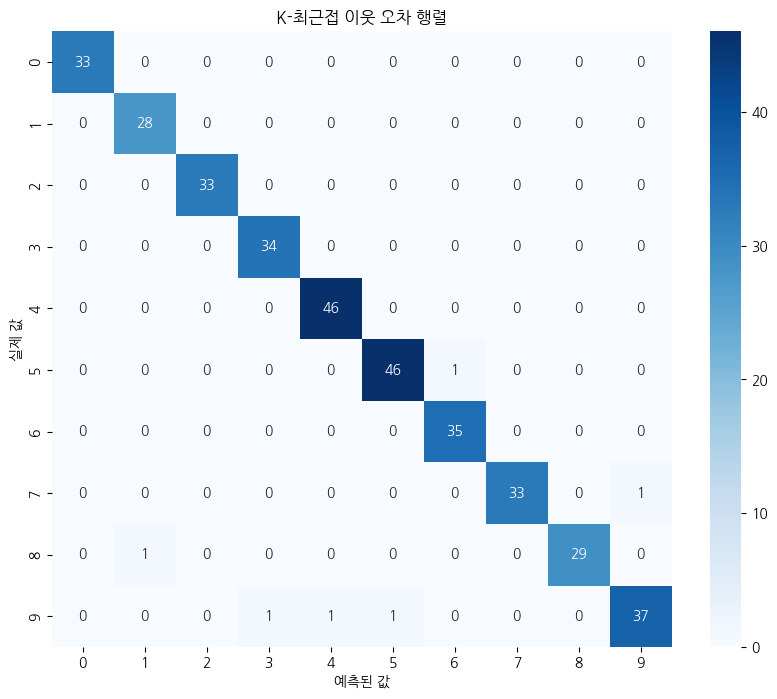

In [1]:
# 파일명: 14_K-최근접 이웃(KNN)_다중_분류.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# -----------------------------------------------------------
# 1. 환경 설정 및 라이브러리 설치 안내
# -----------------------------------------------------------
# 이 코드를 실행하기 위해 필요한 패키지를 설치하는 방법입니다.
# 사용하시는 가상 환경 이름은 'mldl_env_250804'를 자동으로 사용합니다.
# 터미널에서 다음 명령어를 실행하여 필요한 라이브러리를 설치하세요.
# python3 -m pip install scikit-learn matplotlib numpy seaborn

# -----------------------------------------------------------
# 2. 한글 폰트 설정
# -----------------------------------------------------------
# matplotlib에서 한글을 정상적으로 표시하기 위해 폰트를 설정합니다.
# 'NanumGothic' 폰트가 설치되어 있지 않으면 경고가 발생할 수 있습니다.
# 폰트가 없는 경우, 'NanumGothic'을 설치하거나 다른 한글 폰트 이름을 사용하세요.
try:
    font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
except:
    print("경고: NanumGothic 폰트를 찾을 수 없습니다. 한글을 올바르게 표시하려면 한글 폰트를 설치하세요.")

# -----------------------------------------------------------
# 3. 데이터 준비
# -----------------------------------------------------------
# sklearn에서 제공하는 손글씨 숫자(digits) 데이터셋을 로드합니다.
# 이 데이터셋은 0부터 9까지 총 10개의 클래스를 가진 다중 분류 문제입니다.
digits = load_digits()

# 특성(X)과 타겟(y) 데이터를 분리합니다.
X = digits.data
y = digits.target

# -----------------------------------------------------------
# 4. 훈련 세트와 테스트 세트 분리
# -----------------------------------------------------------
# 데이터를 훈련 세트와 테스트 세트로 나눕니다. (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------------------
# 5. K-최근접 이웃(KNN) 모델 훈련
# -----------------------------------------------------------
# KNeighborsClassifier 모델을 생성합니다.
# n_neighbors는 주변 몇 개의 이웃을 참고할지 설정하는 매개변수입니다. 여기서는 3개로 설정했습니다.
# weights는 이웃의 투표에 가중치를 줄지 설정합니다. 'uniform'은 동일한 가중치를 부여합니다.
model = KNeighborsClassifier(n_neighbors=3, weights='uniform')

# 훈련 세트로 모델을 학습시킵니다.
model.fit(X_train, y_train)

# -----------------------------------------------------------
# 6. 모델 평가
# -----------------------------------------------------------
# 테스트 세트를 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도(Accuracy)를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델의 정확도: {accuracy:.4f}")

# 오차 행렬(Confusion Matrix)을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n오차 행렬:")
print(conf_matrix)

# -----------------------------------------------------------
# 7. 오차 행렬 시각화
# -----------------------------------------------------------
# 오차 행렬을 히트맵(heatmap)으로 시각화하여 결과를 쉽게 파악할 수 있습니다.
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("예측된 값")
plt.ylabel("실제 값")
plt.title("K-최근접 이웃 오차 행렬")
plt.show()
